In [67]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import LinearSVC

In [68]:
df_original = pd.read_csv('C:/Users/Богдан/Downloads/train_40k.csv', encoding='latin-1')
df_original

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles
...,...,...,...,...,...,...,...,...,...,...
39995,B0006IYND6,Japonesque Silver Lipstick Palette Kit 1 piece,A1WKFQYYRJ95F6,0/0,3.0,1344211200,Even when it is very convenient I find it real...,beauty,makeup,lips
39996,B000A33FZY,"Truform 20-30 Below Knee Closed-Toe, Beige, Small",A1OMZID10X2JY4,0/0,5.0,1344211200,Wore these the next day after eating Chinese t...,health personal care,medical supplies equipment,braces
39997,B000I7D2L4,Zadro Z300 Wall Mountable Fog Free Mirror,A3I8EYB4CKPQVO,0/0,3.0,1344211200,"this is an OK product. Doesn't really stay ""fo...",beauty,tools accessories,mirrors
39998,B000KHKKB2,Opalescent Glitter Lotion - 6.3 oz - Liquid,A3GTQQ5ZFCFBBL,0/0,4.0,1344211200,"This ""Glitter-Up"" body lotion offers tremendou...",beauty,skin care,body


In [69]:
columns = ['Text', 'Cat1']
df = shuffle(df_original[columns])
df = df.iloc[:2000]
df.index = pd.RangeIndex(0, 2000)
df

,Text,Cat1
0,"I am 5 months pregnant, and my OB-GYN suggeste...",beauty
1,I bought this make-up in NYC at Henri Bendel a...,beauty
2,This is an awesome demi-permanent hair color. ...,beauty
3,"I had Optimus Prime when he frist came out, bu...",toys games
4,I purchased this flea control for my cat becau...,pet supplies
...,...,...
1995,It worked really well during the first 4 month...,baby products
1996,Bought this for my daughters for Hanukkah / Ch...,toys games
1997,I've had IBS for a while and suffer from const...,health personal care
1998,I received this as a baby shower gift and atta...,toys games


<AxesSubplot:>

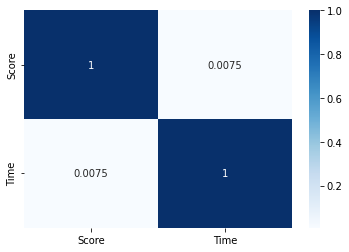

In [70]:
#pylab.figure(figsize=(15,15))
cor = df_original.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

In [71]:
df['length'] = df['Text'].apply(len)
df

,Text,Cat1,length
0,"I am 5 months pregnant, and my OB-GYN suggeste...",beauty,344
1,I bought this make-up in NYC at Henri Bendel a...,beauty,533
2,This is an awesome demi-permanent hair color. ...,beauty,268
3,"I had Optimus Prime when he frist came out, bu...",toys games,266
4,I purchased this flea control for my cat becau...,pet supplies,629
...,...,...,...
1995,It worked really well during the first 4 month...,baby products,265
1996,Bought this for my daughters for Hanukkah / Ch...,toys games,246
1997,I've had IBS for a while and suffer from const...,health personal care,649
1998,I received this as a baby shower gift and atta...,toys games,890


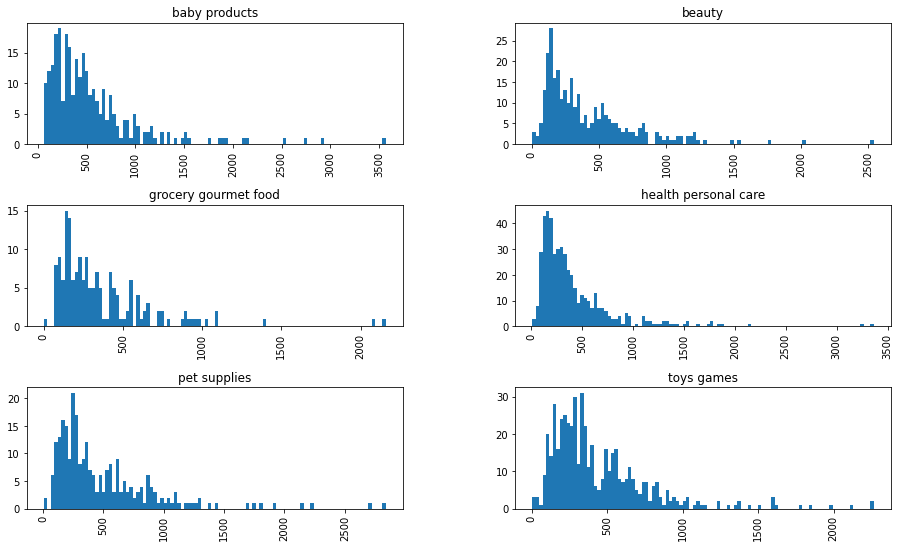

In [72]:
df.hist(column='length', by='Cat1', bins=100,figsize=(15,9))
plt.show()

In [73]:
df.drop('length',axis=1,inplace=True)

In [74]:
df.Cat1.value_counts()
df_1=df.Text
dff=df

In [75]:
df_1

0       I am 5 months pregnant, and my OB-GYN suggeste...
1       I bought this make-up in NYC at Henri Bendel a...
2       This is an awesome demi-permanent hair color. ...
3       I had Optimus Prime when he frist came out, bu...
4       I purchased this flea control for my cat becau...
                              ...                        
1995    It worked really well during the first 4 month...
1996    Bought this for my daughters for Hanukkah / Ch...
1997    I've had IBS for a while and suffer from const...
1998    I received this as a baby shower gift and atta...
1999    Having powdered buttermilk available at a mome...
Name: Text, Length: 2000, dtype: object

In [76]:
df_2 = df_1.str.replace(r'[^\w\d\s]', ' ')
df_2 = df_2.str.replace(r'\s+', ' ')
df_2 = df_2.str.replace(r'^\s+|\s*?$', ' ')
df_2 = df_2.str.replace(r'\d+(\.\d+)?', 'number')
df_2

0       I am number months pregnant and my OB GYN sugg...
1       I bought this make up in NYC at Henri Bendel a...
2       This is an awesome demi permanent hair color M...
3       I had Optimus Prime when he frist came out but...
4       I purchased this flea control for my cat becau...
                              ...                        
1995    It worked really well during the first number ...
1996    Bought this for my daughters for Hanukkah Chri...
1997    I ve had IBS for a while and suffer from const...
1998    I received this as a baby shower gift and atta...
1999    Having powdered buttermilk available at a mome...
Name: Text, Length: 2000, dtype: object

In [77]:
df_2 = df_2.str.lower()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_2 = df_2.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
import nltk
ps = nltk.PorterStemmer()
df_2 = df_2.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Богдан\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
all_words = []
for df_1 in df_2:
    words = word_tokenize(df_1)
    for w in words:
        all_words.append(w)
       
all_words = nltk.FreqDist(all_words) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Богдан\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(df_2)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
df_5 = df
df = tfidf_data

In [80]:
Cat1 = dff['Cat1']
Cat1

0                     beauty
1                     beauty
2                     beauty
3                 toys games
4               pet supplies
                ...         
1995           baby products
1996              toys games
1997    health personal care
1998              toys games
1999    grocery gourmet food
Name: Cat1, Length: 2000, dtype: object

In [81]:
df['Cat1'] = Cat1
df

,0,1,2,3,4,5,6,7,8,9,...,7517,7518,7519,7520,7521,7522,7523,7524,7525,Cat1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,beauty
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,beauty
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,beauty
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,toys games
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pet supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby products
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,toys games
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,health personal care
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,toys games


In [82]:
X = df.drop('Cat1',axis=1)
Y = Cat1
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)
print(len(X_train))
print(len(X_test))

1600
400


In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import naive_bayes, svm
from sklearn.preprocessing import Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

In [84]:
normalizer = Normalizer()
# scaler = RobustScaler()
normalizer.fit(X_train)
# X_train = scaler.fit_transform(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

In [85]:
parameter_grid = {
            'n_neighbors': [3,4,5],
            'weights': ['distance', 'uniform'],
            'p': [1, 2, 3]
        }

grid_searcher = GridSearchCV(KNeighborsClassifier(), parameter_grid, cv = 3, verbose=2, n_jobs=3, refit=True)
grid_searcher.fit(X_train, Y_train)
knn_model = grid_searcher.best_estimator_
 
print('Best params = ', knn_model.get_params())

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params =  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


F1 Score : 0.7228430671571096
Report:
                       precision    recall  f1-score   support

       baby products    0.68254   0.70492   0.69355        61
              beauty    0.66667   0.76667   0.71318        60
grocery gourmet food    0.69231   0.62069   0.65455        29
health personal care    0.66316   0.63000   0.64615       100
        pet supplies    0.80435   0.75510   0.77895        49
          toys games    0.81188   0.81188   0.81188       101

            accuracy                        0.72250       400
           macro avg    0.72015   0.71488   0.71638       400
        weighted avg    0.72360   0.72250   0.72216       400

Confusion Matrix: 
 [[43  3  1  4  2  8]
 [ 3 46  1  7  0  3]
 [ 1  0 18  9  1  0]
 [ 7 13  6 63  4  7]
 [ 2  4  0  5 37  1]
 [ 7  3  0  7  2 82]]


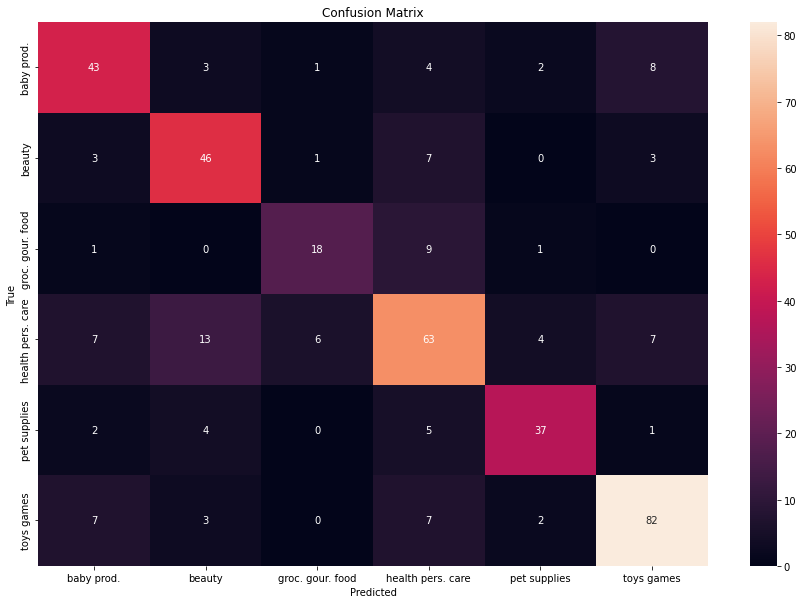

In [86]:
knn_preds = knn_model.predict(X_test)
print("F1 Score :",f1_score(knn_preds,Y_test,average = "weighted"))
print('Report:\n',classification_report(Y_test, knn_preds, digits=5))
print('Confusion Matrix: \n',confusion_matrix(Y_test, knn_preds))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test, knn_preds), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))

In [89]:
parameter_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [7, 10, 15]
        }

grid_searcher = GridSearchCV(DecisionTreeClassifier(), parameter_grid, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
tree_model = grid_searcher.best_estimator_
 
print('Best params = ', tree_model.get_params())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params =  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


F1 Score : 0.5317816453865362
Report:
                       precision    recall  f1-score   support

       baby products    0.66667   0.29508   0.40909        61
              beauty    0.65217   0.25000   0.36145        60
grocery gourmet food    0.64706   0.37931   0.47826        29
health personal care    0.38117   0.85000   0.52632       100
        pet supplies    0.76667   0.46939   0.58228        49
          toys games    0.71250   0.56436   0.62983       101

            accuracy                        0.52250       400
           macro avg    0.63771   0.46802   0.49787       400
        weighted avg    0.61552   0.52250   0.51322       400

Confusion Matrix: 
 [[18  1  0 27  0 15]
 [ 1 15  0 40  1  3]
 [ 0  0 11 17  0  1]
 [ 2  7  5 85  1  0]
 [ 1  0  1 20 23  4]
 [ 5  0  0 34  5 57]]


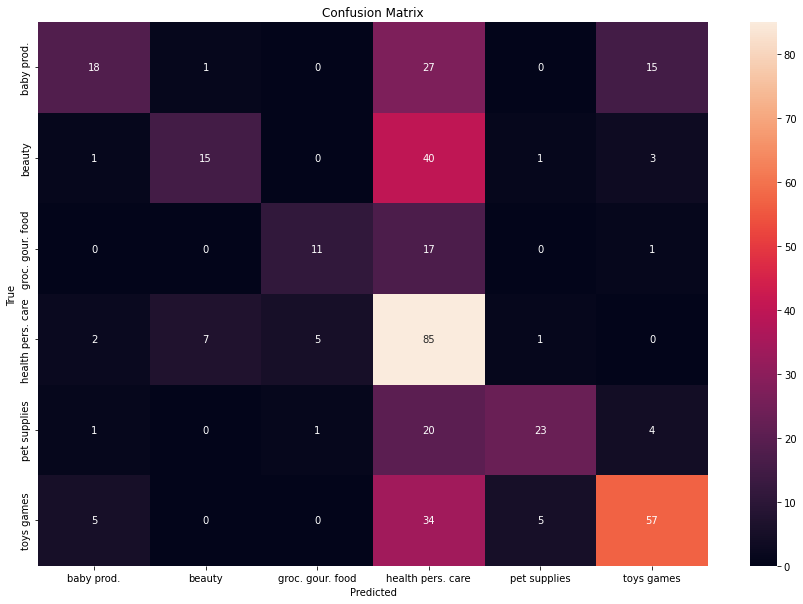

In [91]:
tree_pred = tree_model.predict(X_test)
print("F1 Score :",f1_score(tree_pred,Y_test,average = "weighted"))
print('Report:\n',classification_report(Y_test, tree_pred, digits=5))
print('Confusion Matrix: \n',confusion_matrix(Y_test, tree_pred))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test, tree_pred), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))

In [92]:
parameter_grid = {
            'C': [1, 1.2],
            'gamma': ['scale', 'auto', 0.001]
        }

grid_searcher = GridSearchCV(SVC(), parameter_grid, cv=3,  verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
svc_model = grid_searcher.best_estimator_
 
print('Best params = ', svc_model.get_params())

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best params =  {'C': 1.2, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


F1 Score : 0.7124583864447519
Report:
                       precision    recall  f1-score   support

       baby products    0.91667   0.54098   0.68041        61
              beauty    0.77273   0.56667   0.65385        60
grocery gourmet food    0.83333   0.34483   0.48780        29
health personal care    0.53216   0.91000   0.67159       100
        pet supplies    0.93103   0.55102   0.69231        49
          toys games    0.81481   0.87129   0.84211       101

            accuracy                        0.70750       400
           macro avg    0.80012   0.63080   0.67134       400
        weighted avg    0.76895   0.70750   0.70254       400

Confusion Matrix: 
 [[33  2  0 14  1 11]
 [ 0 34  0 21  0  5]
 [ 0  0 10 18  0  1]
 [ 1  5  2 91  0  1]
 [ 0  3  0 17 27  2]
 [ 2  0  0 10  1 88]]


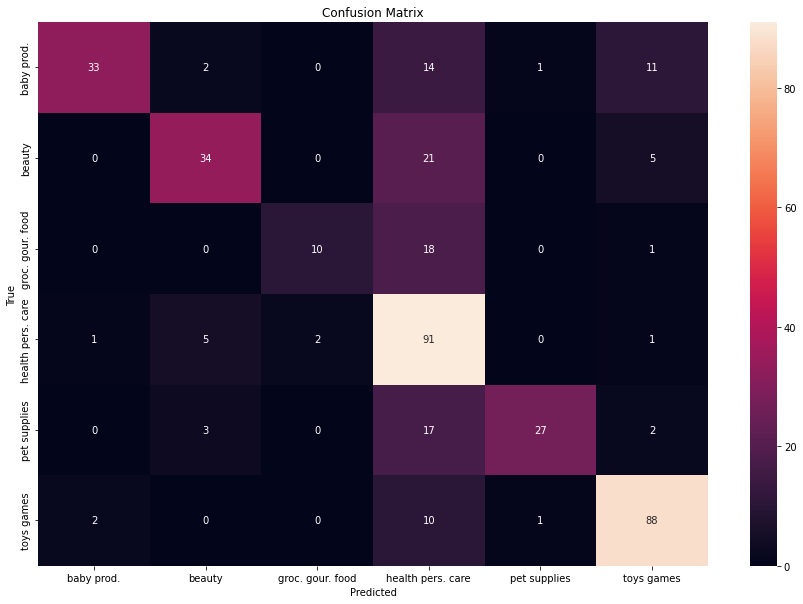

In [93]:
svc_pred = svc_model.predict(X_test)
print("F1 Score :",f1_score(svc_pred,Y_test,average = "weighted"))
print('Report:\n',classification_report(Y_test, svc_pred, digits=5))
print('Confusion Matrix: \n',confusion_matrix(Y_test, svc_pred))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test, svc_pred), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))

In [94]:
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 15, 20],
            'n_estimators': [10, 30, 50]
        }

grid_searcher = GridSearchCV(RandomForestClassifier(), parameter_grid, cv=3, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
forest_model = grid_searcher.best_estimator_
 
print('Best params = ', forest_model.get_params())

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


F1 Score : 0.6418335220206491
Report:
                       precision    recall  f1-score   support

       baby products    0.84615   0.18033   0.29730        61
              beauty    0.84211   0.53333   0.65306        60
grocery gourmet food    0.75000   0.20690   0.32432        29
health personal care    0.49432   0.87000   0.63043       100
        pet supplies    0.85185   0.46939   0.60526        49
          toys games    0.61594   0.84158   0.71130       101

            accuracy                        0.61000       400
           macro avg    0.73340   0.51692   0.53695       400
        weighted avg    0.69319   0.61000   0.57817       400

Confusion Matrix: 
 [[11  1  0 19  1 29]
 [ 0 32  0 23  0  5]
 [ 0  1  6 20  0  2]
 [ 1  4  1 87  1  6]
 [ 0  0  1 14 23 11]
 [ 1  0  0 13  2 85]]


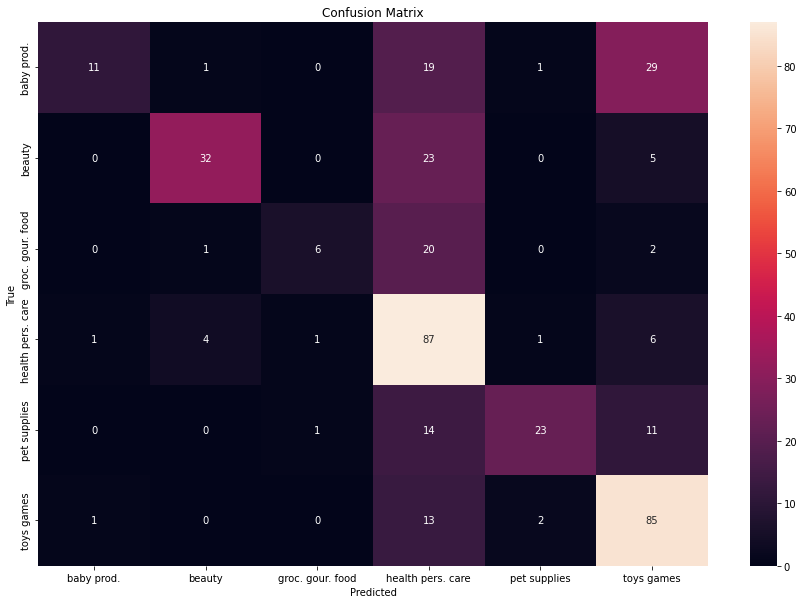

In [95]:
forest_pred = forest_model.predict(X_test)
print("F1 Score :",f1_score(forest_pred,Y_test,average = "weighted"))
print('Report:\n',classification_report(Y_test, forest_pred, digits=5))
print('Confusion Matrix: \n',confusion_matrix(Y_test, forest_pred))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test, forest_pred), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))

In [96]:
parameter_grid = {
            'base_estimator': [DecisionTreeClassifier(), forest_model, tree_model],
            'n_estimators': [20, 50],
            'learning_rate': [0.05, 0.07, 0.1]
        }

grid_searcher = GridSearchCV(AdaBoostClassifier(), parameter_grid, cv=2, verbose=2, n_jobs=5, refit=True)
grid_searcher.fit(X_train, Y_train)
ab_model = grid_searcher.best_estimator_
 
print('Best params = ', forest_model.get_params())

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


F1 Score : 0.661319540897897
Report:
                       precision    recall  f1-score   support

       baby products    0.85714   0.39344   0.53933        61
              beauty    0.87097   0.45000   0.59341        60
grocery gourmet food    0.77778   0.24138   0.36842        29
health personal care    0.48148   0.91000   0.62976       100
        pet supplies    0.89286   0.51020   0.64935        49
          toys games    0.73913   0.84158   0.78704       101

            accuracy                        0.64750       400
           macro avg    0.76989   0.55777   0.59455       400
        weighted avg    0.73412   0.64750   0.63368       400

Confusion Matrix: 
 [[24  0  0 17  1 19]
 [ 1 27  0 30  0  2]
 [ 0  0  7 21  0  1]
 [ 1  3  2 91  1  2]
 [ 0  1  0 17 25  6]
 [ 2  0  0 13  1 85]]


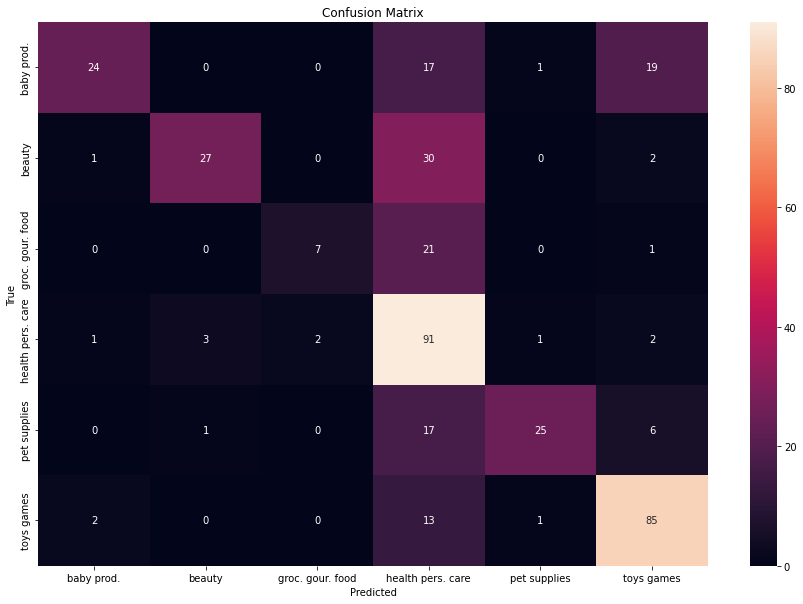

In [97]:
ab_pred = ab_model.predict(X_test)
print("F1 Score :",f1_score(ab_pred,Y_test,average = "weighted"))
print('Report:\n',classification_report(Y_test, ab_pred, digits=5))
print('Confusion Matrix: \n',confusion_matrix(Y_test, ab_pred))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(Y_test, ab_pred), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))